## Preparacion del entorno

In [3]:
# Impotar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [4]:
# leer el dataset
df_0 = pd.read_csv('titanic_dataset.csv')

In [6]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Seleccionar columnas relevantes para el clusterig
df = df_0[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
# manejar los valores nulos
df['Age'].fillna(df['Age'].mean(), inplace=True)

/var/folders/kw/4wrh588x7g5_4x1y7pjyp2c40000gn/T/ipykernel_77622/2612020776.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/var/folders/kw/4wrh588x7g5_4x1y7pjyp2c40000gn/T/ipykernel_77622/2612020776.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].fillna(df['Age'].mean(), inpla

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [9]:
# Estandarizar las caracteristicas df
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [12]:
df_scaled

array([[ 0.82737724, -0.5924806 ,  0.43279337, -0.47367361, -0.50244517],
       [-1.56610693,  0.63878901,  0.43279337, -0.47367361,  0.78684529],
       [ 0.82737724, -0.2846632 , -0.4745452 , -0.47367361, -0.48885426],
       ...,
       [ 0.82737724,  0.        ,  0.43279337,  2.00893337, -0.17626324],
       [-1.56610693, -0.2846632 , -0.4745452 , -0.47367361, -0.04438104],
       [ 0.82737724,  0.17706291, -0.4745452 , -0.47367361, -0.49237783]],
      shape=(891, 5))

## Visualizacion de los datos

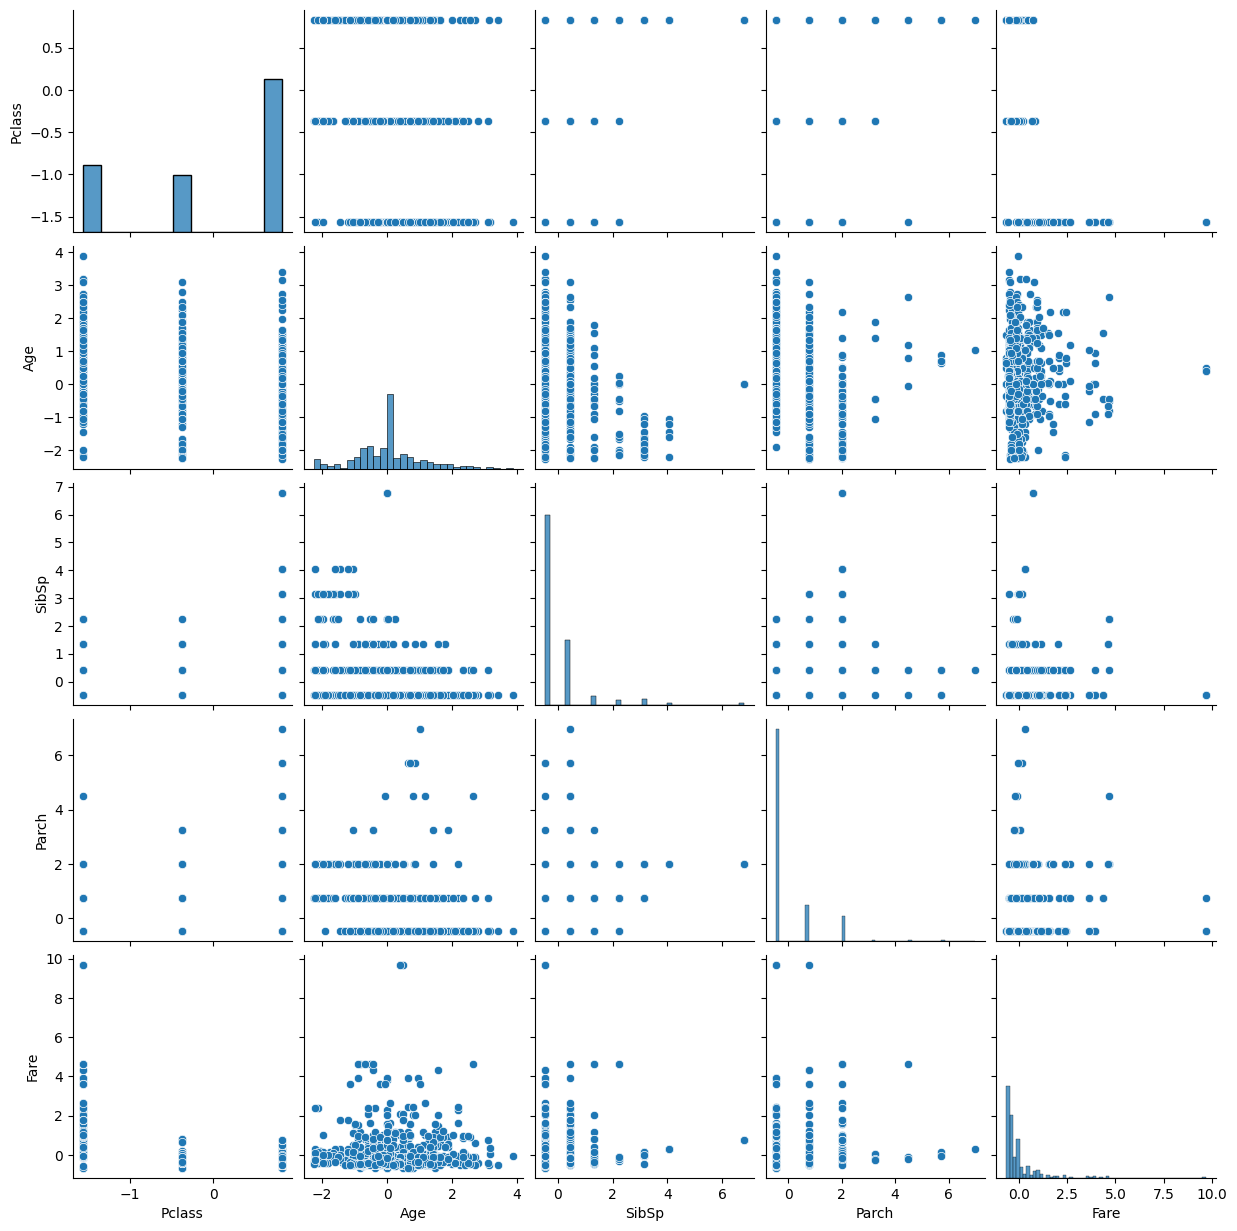

In [14]:
# Visualizar la distribucion de las caracteristicas con pairplot
sns.pairplot(pd.DataFrame(df_scaled, columns=df.columns))

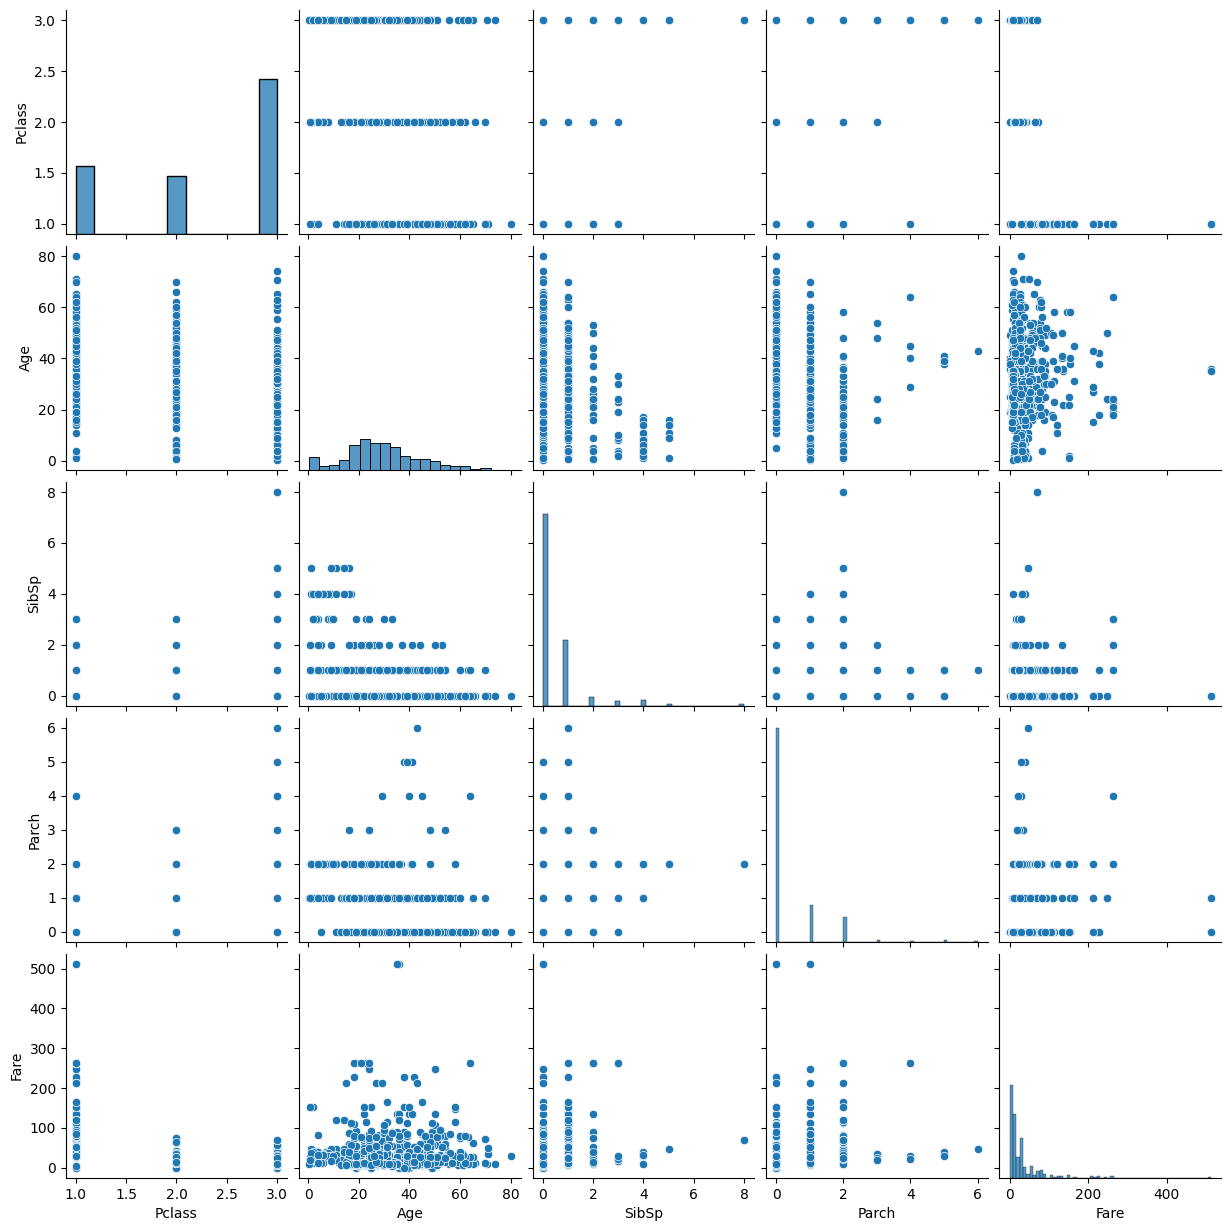

In [15]:
# Visualizar la distibucion de las caracteristicas con pairplot al df_0
sns.pairplot(df_0[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])

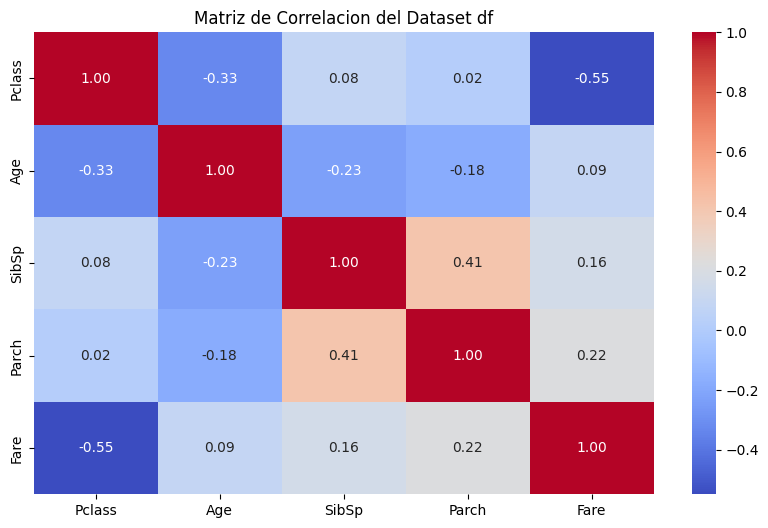

In [17]:
# Matriz de correlacion del dataset df
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlacion del Dataset df')
plt.show()  

## Determinacion del numero de clusters

### Metodo del codo

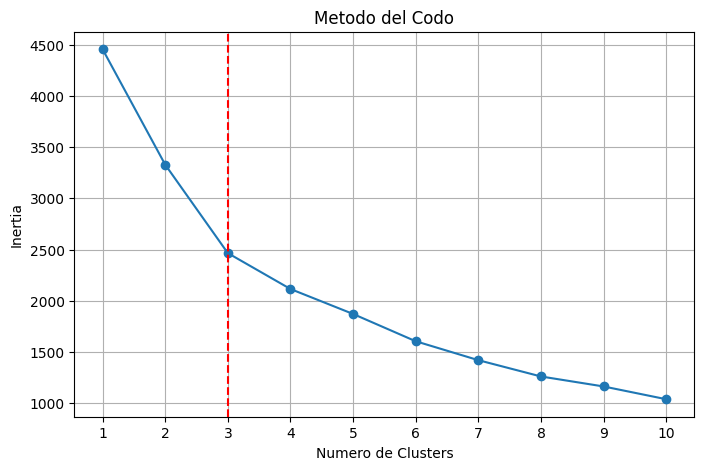

In [19]:
# Determinar el numero optimo de clusters usando el metodo del codo
inertia = []
k = range(1, 11)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Metodo del Codo')
plt.xlabel('Numero de Clusters')
plt.ylabel('Inertia')
plt.axvline(x=3, color='r', linestyle='--', label='Numero Optimo de Clusters')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

### Metodo de la silueta

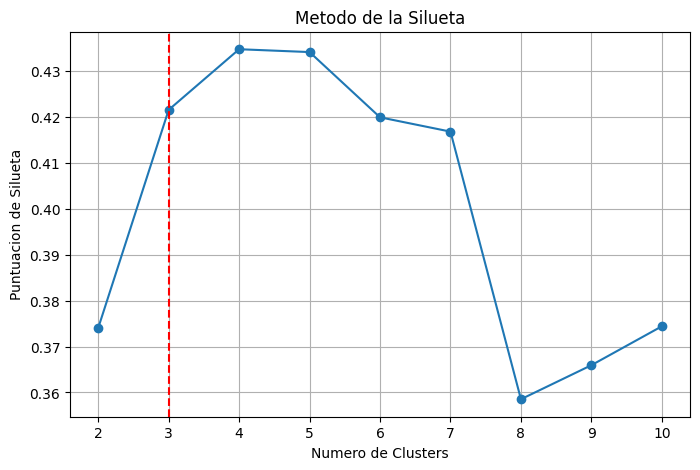

In [22]:
# Determinar el numero optimo de clusters con el metodo de la silueta
silhouette_scores = []
for k in range(2, 11):  # Start from k=2 to avoid ValueError
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Metodo de la Silueta')
plt.xlabel('Numero de Clusters')
plt.ylabel('Puntuacion de Silueta')
plt.axvline(x=3, color='r', linestyle='--', label='Numero Optimo de Clusters')
plt.xticks(range(2, 11))
plt.grid()
plt.show()

## Implementar K-Mean con 3 clusters

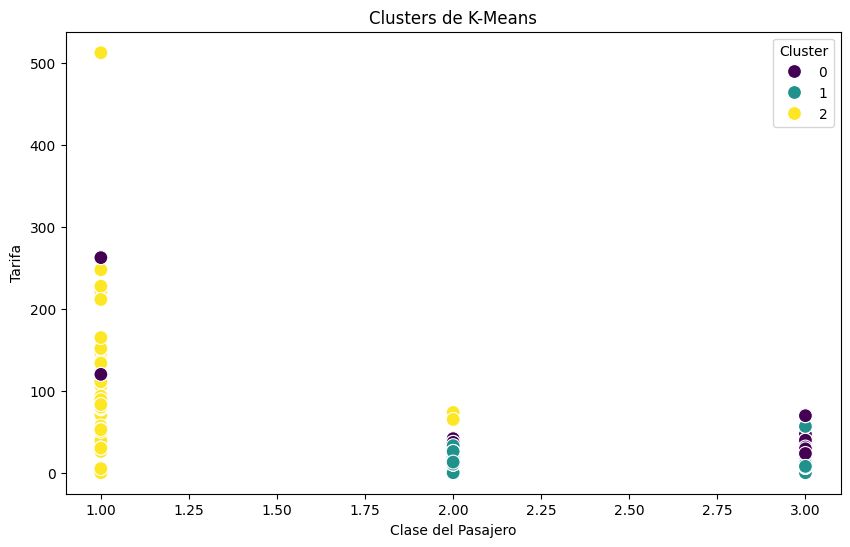

In [24]:
# Implementar K-Mean con el numero optimo de clusters (3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10, init='k-means++')
kmeans.fit(df_scaled)   

# Agregar las etiquetas de cluster al dataframe original
df_0['Cluster'] = kmeans.labels_    
# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_0, x='Pclass', y='Fare', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters de K-Means')
plt.xlabel('Clase del Pasajero')
plt.ylabel('Tarifa')
plt.legend(title='Cluster')
plt.show()

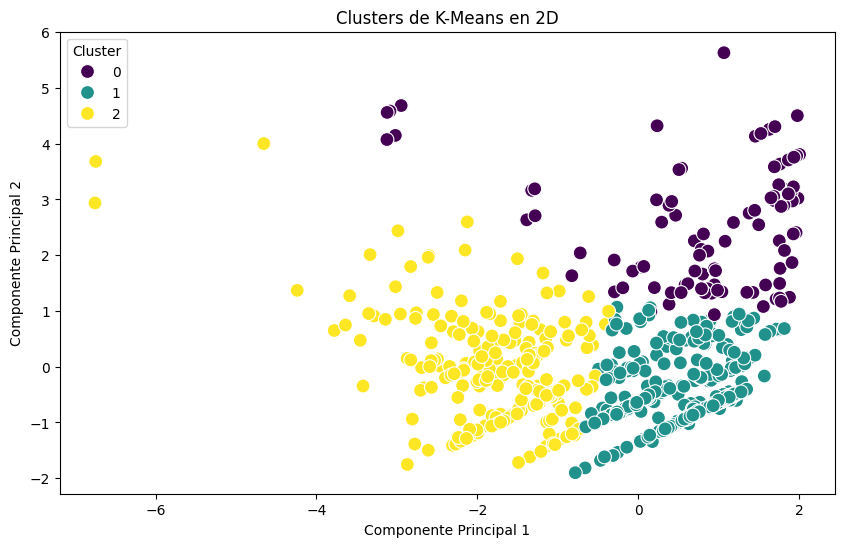

In [25]:
# Reducir la dimensionalidad a 2D para visualizar los clusters
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_0['PCA1'] = df_pca[:, 0]
df_0['PCA2'] = df_pca[:, 1]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_0, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters de K-Means en 2D')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()

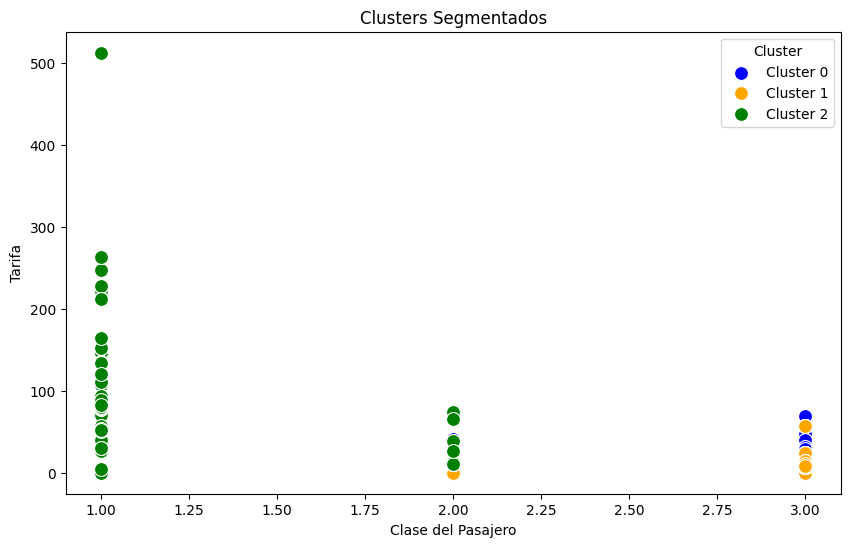

In [26]:
# Segmentar el dataset por clusters
df_cluster_0 = df_0[df_0['Cluster'] == 0]
df_cluster_1 = df_0[df_0['Cluster'] == 1]
df_cluster_2 = df_0[df_0['Cluster'] == 2]
# Visualizar los clusters segmentados
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cluster_0, x='Pclass', y='Fare', color='blue', label='Cluster 0', s=100)
sns.scatterplot(data=df_cluster_1, x='Pclass', y='Fare', color='orange', label='Cluster 1', s=100)
sns.scatterplot(data=df_cluster_2, x='Pclass', y='Fare', color='green', label='Cluster 2', s=100)
plt.title('Clusters Segmentados')
plt.xlabel('Clase del Pasajero')
plt.ylabel('Tarifa')
plt.legend(title='Cluster')
plt.show()

Numero de pasajeros por cluster:
Cluster
1    542
2    239
0    110
Name: count, dtype: int64

Distribucion de pasajeros por cluster:
Cluster
1    60.830527
2    26.823793
0    12.345679
Name: count, dtype: float64


/var/folders/kw/4wrh588x7g5_4x1y7pjyp2c40000gn/T/ipykernel_77622/486159573.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


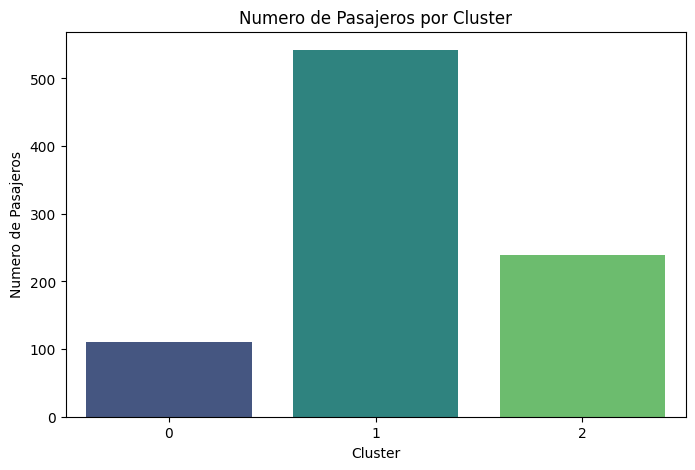

<Figure size 640x480 with 0 Axes>

In [28]:
# mostrar el numero de pasajeros por cluster
cluster_counts = df_0['Cluster'].value_counts()
print("Numero de pasajeros por cluster:")
print(cluster_counts)
print("\nDistribucion de pasajeros por cluster:")
print(cluster_counts / len(df_0) * 100)
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Numero de Pasajeros por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Numero de Pasajeros')
plt.xticks(rotation=0)
plt.show()
plt.tight_layout()


In [ ]:
# perfil por pasajeros por cluster


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cluster,PCA1,PCA2
count,239.000000,239.000000,239.000000,209.000000,239.000000,239.000000,239.000000,239.0,239.000000,239.000000
mean,465.753138,0.577406,1.138075,41.148325,0.364017,0.280335,71.274390,2.0,-1.766050,-0.046179
std,244.242651,0.495009,0.345703,13.670030,0.523926,0.601879,72.131312,0.0,0.926084,0.968322
min,2.000000,0.000000,1.000000,15.000000,0.000000,0.000000,0.000000,2.0,-6.753033,-1.753664
25%,269.500000,0.000000,1.000000,31.000000,0.000000,0.000000,27.360400,2.0,-2.171994,-0.717683
50%,487.000000,1.000000,1.000000,41.000000,0.000000,0.000000,52.554200,2.0,-1.611299,-0.129203
75%,671.500000,1.000000,1.000000,51.000000,1.000000,0.000000,83.158300,2.0,-1.137241,0.477707
max,890.000000,1.000000,2.000000,80.000000,2.000000,4.000000,512.329200,2.0,-0.367381,4.001573
